In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /home/duarte/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/duarte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/duarte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Perform basic EDA and Data cleaning
- Check for missing values; address any missing data accordingly
- Apply methods to remove stopwords and lemmatize words
- Break-down sentences into words for word-level analysis


In [3]:
# Load the dataset [term, url, text]
df = pd.read_csv('results.csv', header=0)

# Check for missing values; address any missing data if necessary
has_missing = df.isnull().values.any()
if has_missing:
    print('Missing values found. Dropping rows with missing values.')
    df.dropna(inplace=True)
else:
    print('No missing values found.')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def tokenize(text):    
    for word in word_tokenize(text):
        lword = word.lower()
        if lword.isalnum() and lword not in stop_words:
            lemWord = lemmatizer.lemmatize(lword)
            yield lemWord

# Tokenize the reviews
## Create column with tokens from review
df['tokens'] = df['text'].apply(lambda x: [t for t in tokenize(x)])
df['sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


df.head()


No missing values found.


,term,url,text,tokens,sentence_count
0,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290052...,"De acordo com Miguel Relvas, Guilhermino Rodri...","[acordo, miguel, relvas, guilhermino, rodrigue...",12
1,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200803111828...,"De acordo com Miguel Relvas, Guilhermino Rodri...","[acordo, miguel, relvas, guilhermino, rodrigue...",12
2,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211901...,Composição do III Governo Constitucional Toma...,"[composição, iii, governo, constitucional, tom...",26
3,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211827...,CORRESPONDENTES NACIONAIS Alcobaça: Amadeu Lea...,"[correspondentes, nacionais, alcobaça, amadeu,...",1
4,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200602160601...,15 de Fevereiro 2006 Fátima Felgueiras recebeu...,"[15, fevereiro, 2006, fátima, felgueiras, rece...",1


# Visualization
- Visualize review length, word counts and sentences length using bar plots and
kdeplots
- Plot a bar plot with the top 10 most frequently occuring words
- Plot the top 10 most frequently occuring bi-grams and tri-grams

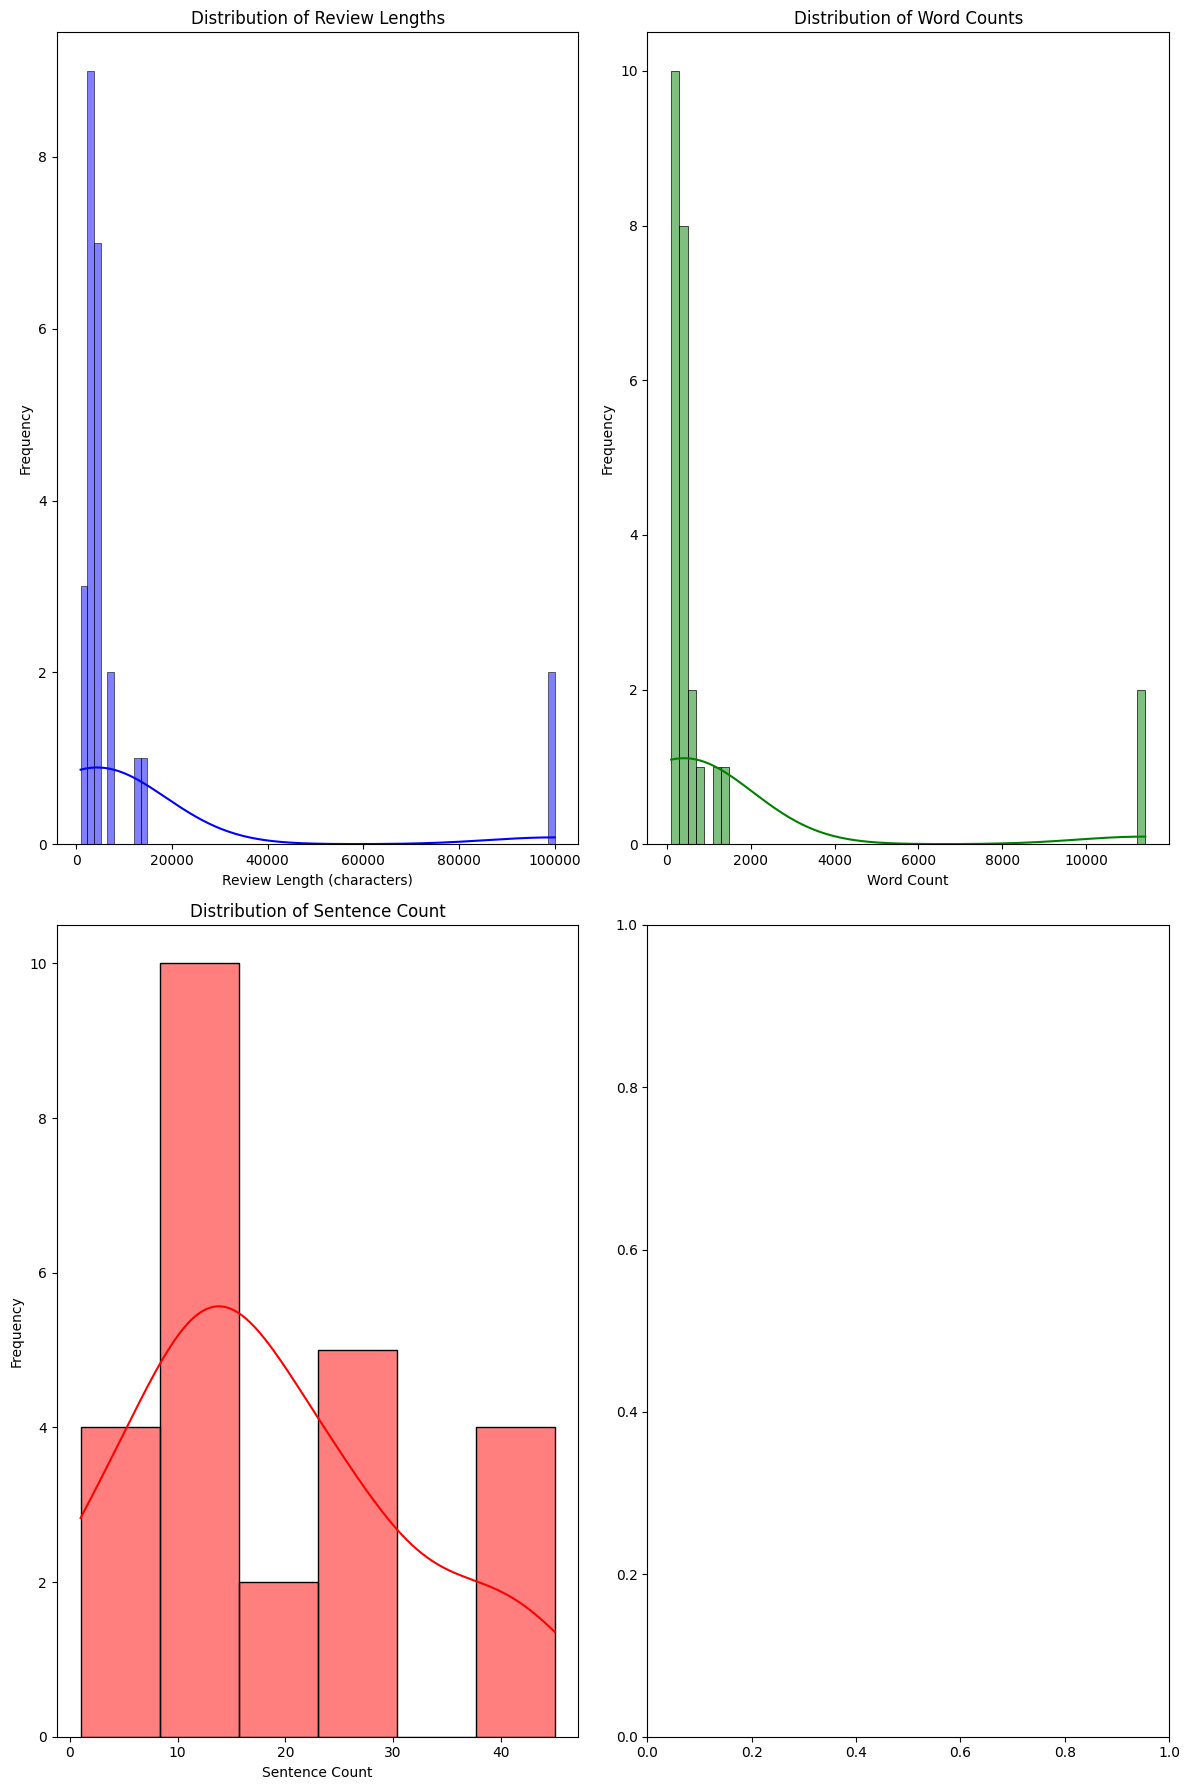

,term,url,text,tokens,sentence_count,review_length,word_count
0,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290052...,"De acordo com Miguel Relvas, Guilhermino Rodri...","[acordo, miguel, relvas, guilhermino, rodrigue...",12,2509,215
1,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200803111828...,"De acordo com Miguel Relvas, Guilhermino Rodri...","[acordo, miguel, relvas, guilhermino, rodrigue...",12,2509,215
2,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211901...,Composição do III Governo Constitucional Toma...,"[composição, iii, governo, constitucional, tom...",26,7759,753
3,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200506211827...,CORRESPONDENTES NACIONAIS Alcobaça: Amadeu Lea...,"[correspondentes, nacionais, alcobaça, amadeu,...",1,904,102
4,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200602160601...,15 de Fevereiro 2006 Fátima Felgueiras recebeu...,"[15, fevereiro, 2006, fátima, felgueiras, rece...",1,100000,11416


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the review length, word count and sentences length using bar plots and kdeplots
df['review_length'] = df['text'].apply(len)
df['word_count'] = df['tokens'].apply(len)

# Make only one plot with all three sub-plots
fig, axes = plt.subplots(2, 2, figsize=(12, 18), sharey=False)
sns.histplot(df['review_length'], color='blue', fill=True, kde=True, ax=axes[0][0])
axes[0][0].set_title('Distribution of Review Lengths')
axes[0][0].set_xlabel('Review Length (characters)')
axes[0][0].set_ylabel('Frequency')

sns.histplot(df['word_count'], color='green', fill=True, kde=True, ax=axes[0][1])
axes[0][1].set_title('Distribution of Word Counts')
axes[0][1].set_xlabel('Word Count')
axes[0][1].set_ylabel('Frequency')

sns.histplot(df['sentence_count'], color='red', fill=True, kde=True, ax=axes[1][0])
axes[1][0].set_title('Distribution of Sentence Count')
axes[1][0].set_xlabel('Sentence Count')
axes[1][0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Plotting review length distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(df['review_length'], color='blue', fill=True,kde=True)
# plt.title('Distribution of Review Lengths')
# plt.xlabel('Review Length (characters)')
# plt.ylabel('Frequency')
# plt.show()

# # Plotting word count distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(df['word_count'], color='green', fill=True,kde=True)
# plt.title('Distribution of Word Counts')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()

# # Plot Review Length Distribution by Sentence Count
# plt.figure(figsize=(10, 6))
# sns.histplot(df['sentence_count'], color='red', fill=True,kde=True)
# plt.title('Distribution of Sentence Count')
# plt.xlabel('Sentence Count')
# plt.ylabel('Frequency')
# plt.show()

df.head()


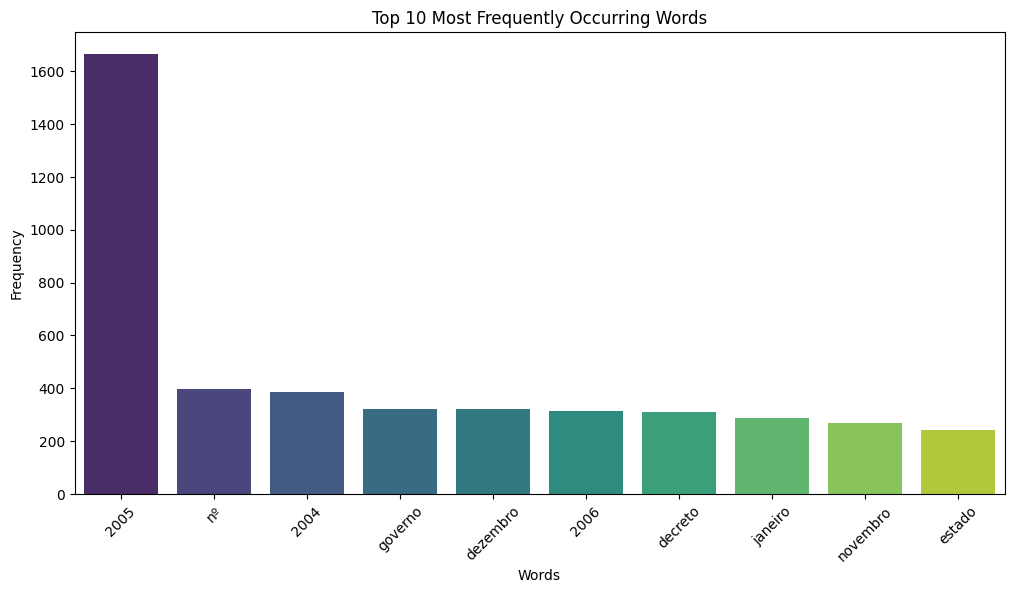

In [6]:
from collections import Counter

# Most Frequently Occurring Words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(10)

# Bar plot of the Top 10 Most Frequently Occurring Words
words, counts = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis", hue=words)
plt.title('Top 10 Most Frequently Occurring Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


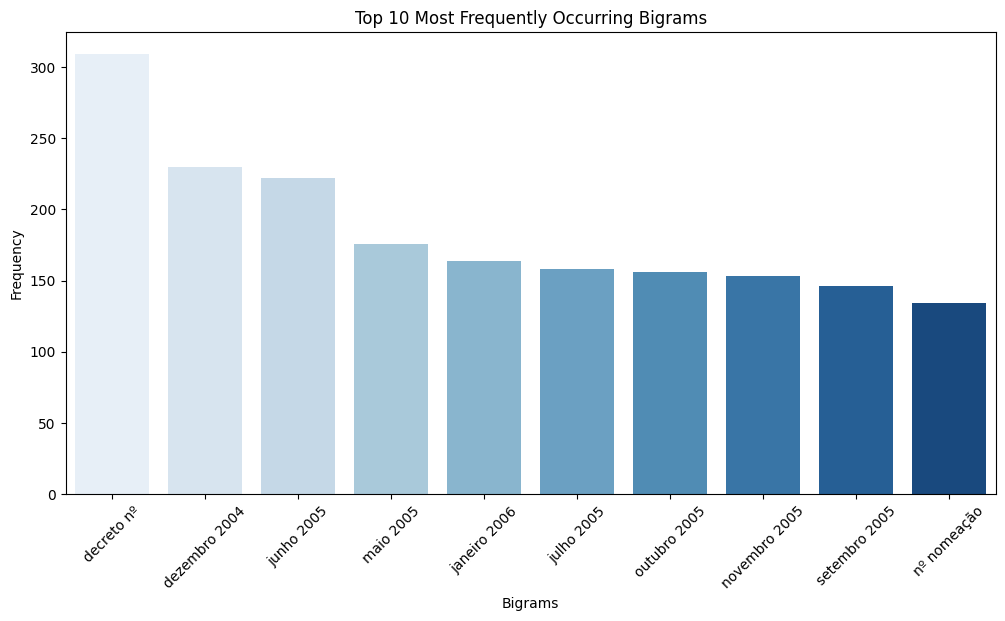

/tmp/ipykernel_14195/717620117.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trigram_labels, y=list(trigram_counts), palette="Purples", dodge=False)


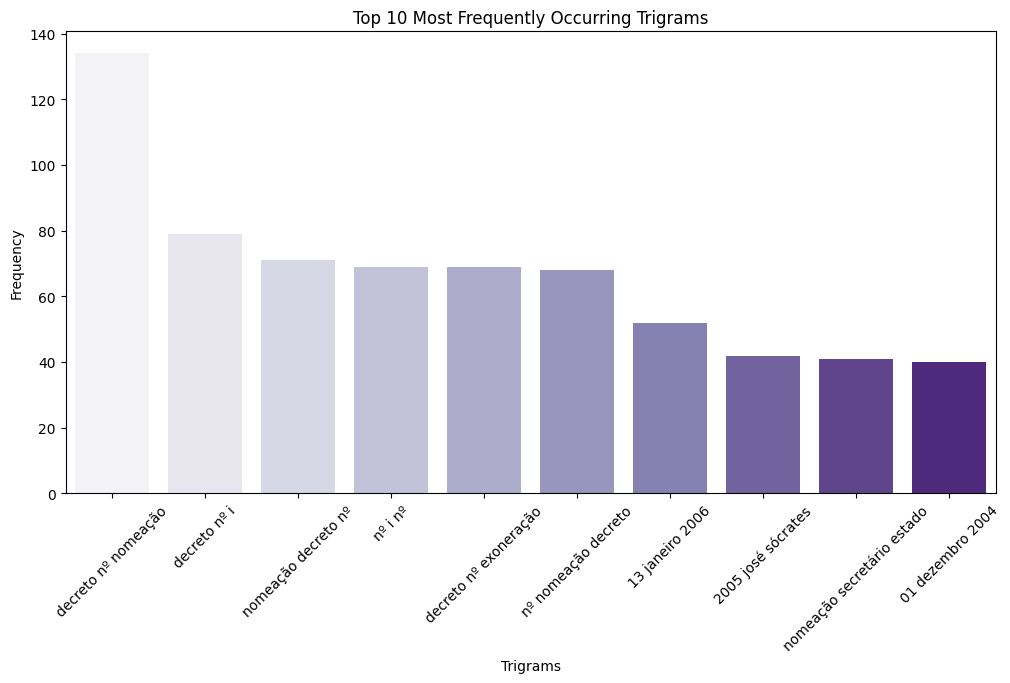

In [8]:
from nltk.util import ngrams

# Most Frequently Occurring Bigrams and Trigrams
bigrams = [bg for tokens in df['tokens'] for bg in ngrams(tokens, 2)]
trigrams = [tg for tokens in df['tokens'] for tg in ngrams(tokens, 3)]

# Top 10 Bigrams
bigram_freq = Counter(bigrams).most_common(10)
bigram_words, bigram_counts = zip(*bigram_freq)
bigram_labels = [' '.join(bigram) for bigram in bigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_labels, y=list(bigram_counts), palette="Blues", hue=bigram_labels)
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top 10 Trigrams
trigram_freq = Counter(trigrams).most_common(10)
trigram_words, trigram_counts = zip(*trigram_freq)
trigram_labels = [' '.join(trigram) for trigram in trigram_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_labels, y=list(trigram_counts), palette="Purples", dodge=False)
plt.title('Top 10 Most Frequently Occurring Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()